# Photometric Calibration

In [1]:
import os
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
from astropy.stats import sigma_clipped_stats
from astropy.table import Table
%matplotlib inline

In [2]:
def mad(arr):
    return 1.4826*np.median(np.abs(arr-np.median(arr)))

In [3]:
def rms(arr):
    return np.sqrt(np.mean(arr**2))

In [4]:
def madrms(arr):
    return 1.4826*np.median(np.abs(arr))

In [5]:
cat0 = Table.read('data/g_all_chip1.fit')

In [6]:
g, = np.where(cat0['ERR']<0.04)
cat = cat0[g]

In [7]:
cat

FRAME,FRAMEID,ID,NIGHT,MAG,ERR,G,GERR,G_R,G_RERR,AIRMASS,NIGHTCOUNT,MJD,UT,WEIGHT,CHIP,EXPTIME,RA,DEC,STDFIELD,SEEING,EXPNUM
bytes11,bytes17,bytes22,int32,float32,float32,float32,float32,float32,float32,float32,int32,int32,bytes15,float32,int32,float32,float64,float32,bytes19,float32,bytes8
00187022_01,00187022_01-789,1237658188927271204,1,17.68,0.0399,18.0045,0.006,1.1383,0.0077,1.2603,11778,56369,00:24:39.025386,0.0251,1,1.0,88.859197,0.9847,SA97_sdss,1.0651501,00187022
00187022_01,00187022_01-1389,1237658188927270937,1,15.7223,0.0111,16.0296,0.0038,1.0951,0.0055,1.2603,11783,56369,00:24:39.025386,0.0901,1,1.0,88.883071,0.9088,SA97_sdss,1.0651501,00187022
00187022_01,00187022_01-1783,1237658188927270975,1,16.3388,0.0176,16.6714,0.0042,1.151,0.0059,1.2603,11788,56369,00:24:39.025386,0.0568,1,1.0,88.899394,0.947,SA97_sdss,1.0651501,00187022
00187022_01,00187022_01-2059,1237658188927271302,1,17.2003,0.0261,17.5062,0.0051,1.3102,0.0067,1.2603,11792,56369,00:24:39.025386,0.0383,1,1.0,88.910758,0.9402,SA97_sdss,1.0651501,00187022
00187022_01,00187022_01-2190,1237658188927271001,1,16.4748,0.0169,16.7977,0.0043,1.0156,0.006,1.2603,11796,56369,00:24:39.025386,0.0592,1,1.0,88.916329,0.9134,SA97_sdss,1.0651501,00187022
00187022_01,00187022_01-2322,1237658188927271354,1,16.9743,0.0284,17.3482,0.0049,1.2591,0.0066,1.2603,11798,56369,00:24:39.025386,0.0352,1,1.0,88.922106,0.8742,SA97_sdss,1.0651501,00187022
00187022_01,00187022_01-2453,1237658188927271375,1,17.0963,0.0245,17.4914,0.0051,1.7069,0.0065,1.2603,11800,56369,00:24:39.025386,0.0408,1,1.0,88.926586,0.9808,SA97_sdss,1.0651501,00187022
00187022_01,00187022_01-2814,1237658188927271409,1,16.9823,0.024,17.2869,0.0048,1.3362,0.0064,1.2603,11802,56369,00:24:39.025386,0.0417,1,1.0,88.940573,0.9307,SA97_sdss,1.0651501,00187022
00187022_01,00187022_01-2849,1237658188927271411,1,17.0693,0.0246,17.454,0.0051,1.5551,0.0067,1.2603,11803,56369,00:24:39.025386,0.0407,1,1.0,88.942178,0.8739,SA97_sdss,1.0651501,00187022


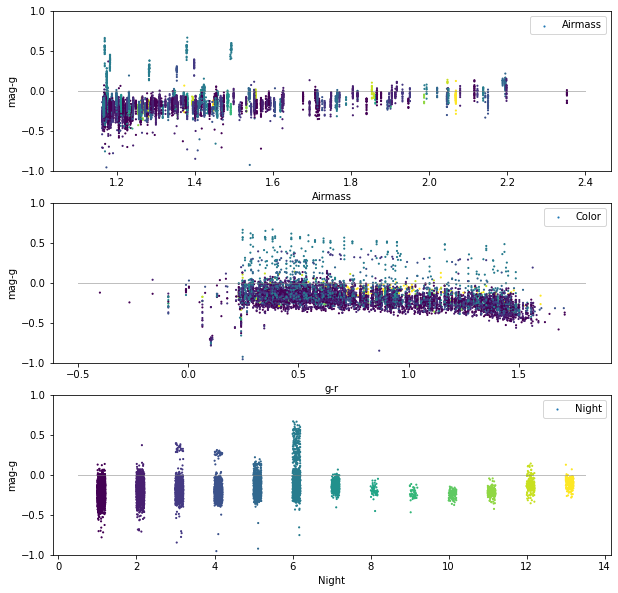

In [8]:
fig,axs = plt.subplots(3,1,figsize=(10,10))
axs[0].scatter(cat['AIRMASS'],cat['MAG']-cat['G'],c=cat['NIGHT'],marker='.',s=5,label='Airmass')
axs[0].plot([1.1,2.4],[0,0],c='gray',linewidth=1,alpha=0.5)
axs[0].set_xlabel('Airmass')
axs[0].set_ylabel('mag-g')
axs[0].set_ylim(-1,1)
axs[0].legend()
axs[1].scatter(cat['G_R'],cat['MAG']-cat['G'],c=cat['NIGHT'],marker='.',s=5,label='Color')
axs[1].plot([-0.5,1.8],[0,0],c='gray',linewidth=1,alpha=0.5)
axs[1].set_xlabel('g-r')
axs[1].set_ylabel('mag-g')
axs[1].set_ylim(-1,1)
axs[1].legend()
rnd = np.random.rand(len(cat))*0.2
axs[2].scatter(cat['NIGHT']+rnd,cat['MAG']-cat['G'],c=cat['NIGHT'],marker='.',s=5,label='Night')
axs[2].plot([0.5,13.5],[0,0],c='gray',linewidth=1,alpha=0.5)
axs[2].set_xlabel('Night')
axs[2].set_ylabel('mag-g')
axs[2].set_ylim(-1,1)
axs[2].legend()
plt.show()

In [9]:
print('MAD RMS = %9.4f' % madrms(cat['MAG']-cat['G']))

MAD RMS =    0.2860


# Extinction term

(-1.0, 1.0)

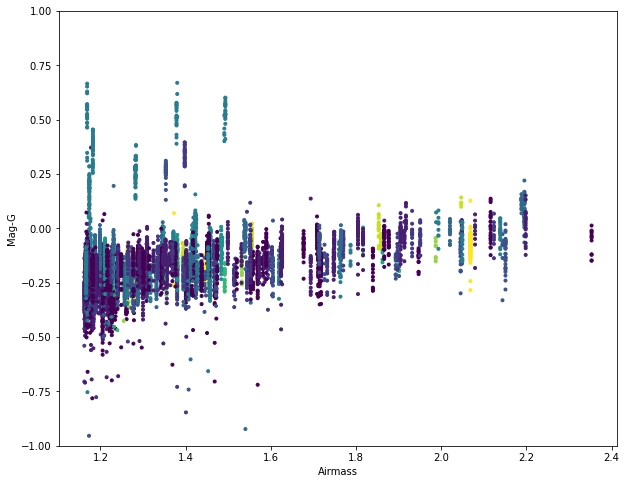

In [10]:
fig = plt.figure(figsize=(10,8))
plt.scatter(cat['AIRMASS'],cat['MAG']-cat['G'],c=cat['NIGHT'],marker='.')
plt.xlabel('Airmass')
plt.ylabel('Mag-G')
plt.ylim(-1,1)

In [11]:
extcoef = np.polyfit(cat['AIRMASS'],cat['MAG']-cat['G'],1)
extfn = np.poly1d(extcoef)
xext = np.linspace(1,2.3,100)
extmodel = extfn(xext)
print(extfn)

 
0.2206 x - 0.4726


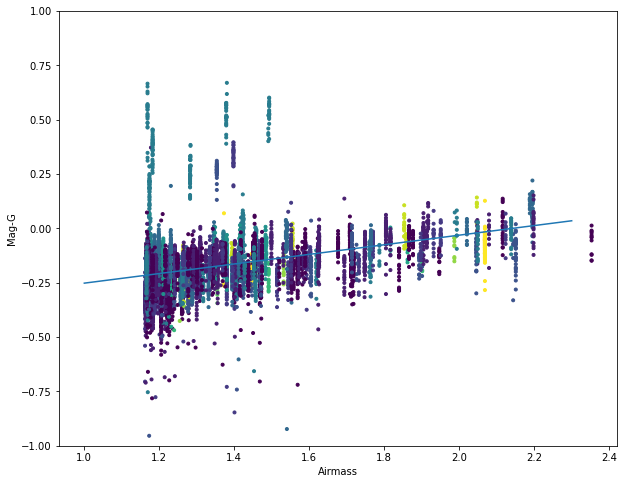

In [12]:
fig = plt.figure(figsize=(10,8))
plt.scatter(cat['AIRMASS'],cat['MAG']-cat['G'],c=cat['NIGHT'],marker='.')
plt.xlabel('Airmass')
plt.ylabel('Mag-G')
plt.ylim(-1,1)
plt.plot(xext,extmodel)

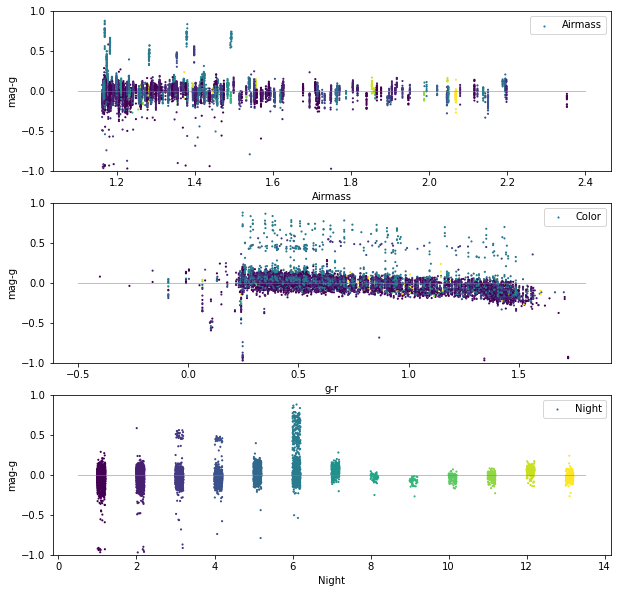

In [13]:
extresid = (cat['MAG']-cat['G']) - extfn(cat['AIRMASS'])
fig,axs = plt.subplots(3,1,figsize=(10,10))
axs[0].scatter(cat['AIRMASS'],extresid,c=cat['NIGHT'],marker='.',s=5,label='Airmass')
axs[0].plot([1.1,2.4],[0,0],c='gray',linewidth=1,alpha=0.5)
axs[0].set_xlabel('Airmass')
axs[0].set_ylabel('mag-g')
axs[0].set_ylim(-1,1)
axs[0].legend()
axs[1].scatter(cat['G_R'],extresid,c=cat['NIGHT'],marker='.',s=5,label='Color')
axs[1].plot([-0.5,1.8],[0,0],c='gray',linewidth=1,alpha=0.5)
axs[1].set_xlabel('g-r')
axs[1].set_ylabel('mag-g')
axs[1].set_ylim(-1,1)
axs[1].legend()
rnd = np.random.rand(len(cat))*0.2
axs[2].scatter(cat['NIGHT']+rnd,extresid,c=cat['NIGHT'],marker='.',s=5,label='Night')
axs[2].plot([0.5,13.5],[0,0],c='gray',linewidth=1,alpha=0.5)
axs[2].set_xlabel('Night')
axs[2].set_ylabel('mag-g')
axs[2].set_ylim(-1,1)
axs[2].legend()

In [14]:
print('MADRMS = %9.4f' % madrms(extresid))

MADRMS =    0.0838


# Color term

(-1.0, 1.0)

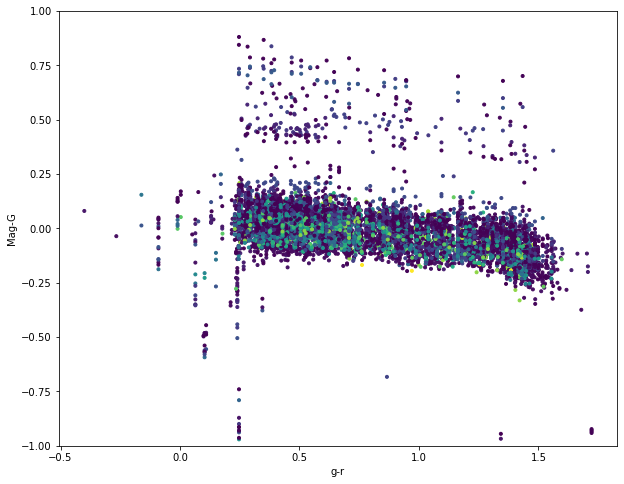

In [15]:
fig = plt.figure(figsize=(10,8))
plt.scatter(cat['G_R'],extresid,c=cat['AIRMASS'],marker='.')
plt.xlabel('g-r')
plt.ylabel('Mag-G')
plt.ylim(-1,1)

In [16]:
colcoef = np.polyfit(cat['G_R'],extresid,1)
colfn = np.poly1d(colcoef)
xcol = np.linspace(0,2.0,100)
colmodel = colfn(xcol)
print(colfn)

 
-0.1231 x + 0.09433


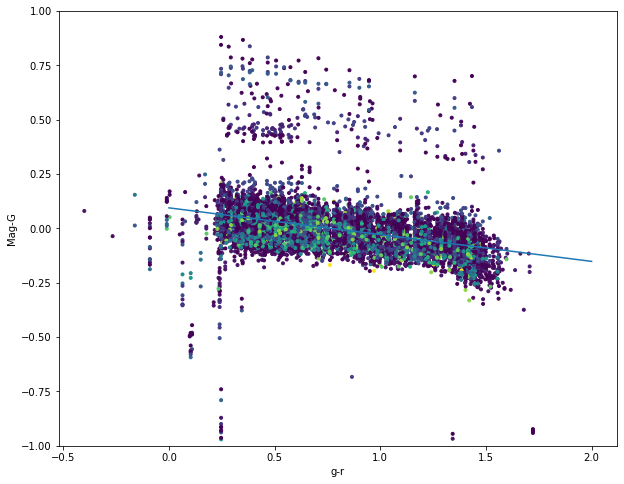

In [17]:
fig = plt.figure(figsize=(10,8))
plt.scatter(cat['G_R'],extresid,c=cat['AIRMASS'],marker='.')
plt.xlabel('g-r')
plt.ylabel('Mag-G')
plt.ylim(-1,1)
plt.plot(xcol,colmodel)

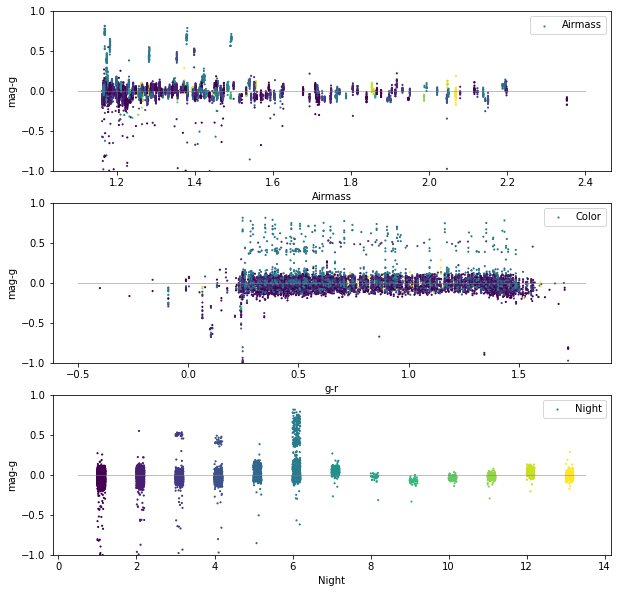

In [18]:
colextresid = extresid - colfn(cat['G_R'])
fig,axs = plt.subplots(3,1,figsize=(10,10))
axs[0].scatter(cat['AIRMASS'],colextresid,c=cat['NIGHT'],marker='.',s=5,label='Airmass')
axs[0].plot([1.1,2.4],[0,0],c='gray',linewidth=1,alpha=0.5)
axs[0].set_xlabel('Airmass')
axs[0].set_ylabel('mag-g')
axs[0].set_ylim(-1,1)
axs[0].legend()
axs[1].scatter(cat['G_R'],colextresid,c=cat['NIGHT'],marker='.',s=5,label='Color')
axs[1].plot([-0.5,1.8],[0,0],c='gray',linewidth=1,alpha=0.5)
axs[1].set_xlabel('g-r')
axs[1].set_ylabel('mag-g')
axs[1].set_ylim(-1,1)
axs[1].legend()
rnd = np.random.rand(len(cat))*0.2
axs[2].scatter(cat['NIGHT']+rnd,colextresid,c=cat['NIGHT'],marker='.',s=5,label='Night')
axs[2].plot([0.5,13.5],[0,0],c='gray',linewidth=1,alpha=0.5)
axs[2].set_xlabel('Night')
axs[2].set_ylabel('mag-g')
axs[2].set_ylim(-1,1)
axs[2].legend()

In [19]:
print('MADRMS = %9.4f' % madrms(colextresid))

MADRMS =    0.0725


# Nightly zero-point terms

In [20]:
zpterm = np.zeros(13,float)
night = np.arange(13)+1
ntcolextresid = colextresid.copy()
for i in range(13):
    g, = np.where(cat['NIGHT']==night[i])
    med = np.median(colextresid[g])
    zpterm[i] = med
    ntcolextresid[g] -= med
    print('%2d %5d %6.3f' % (night[i],len(g),med))

 1  2643 -0.035
 2  1641 -0.001
 3  1172 -0.027
 4  1159 -0.036
 5   782  0.029
 6   886  0.001
 7   404  0.055
 8    46 -0.021
 9    49 -0.073
10   103 -0.036
11   200 -0.021
12   206  0.036
13   200 -0.029


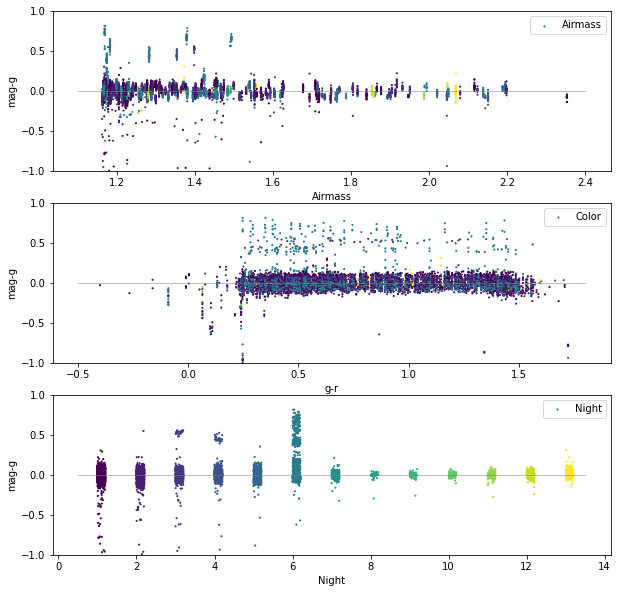

In [21]:
fig,axs = plt.subplots(3,1,figsize=(10,10))
axs[0].scatter(cat['AIRMASS'],ntcolextresid,c=cat['NIGHT'],marker='.',s=5,label='Airmass')
axs[0].plot([1.1,2.4],[0,0],c='gray',linewidth=1,alpha=0.5)
axs[0].set_xlabel('Airmass')
axs[0].set_ylabel('mag-g')
axs[0].set_ylim(-1,1)
axs[0].legend()
axs[1].scatter(cat['G_R'],ntcolextresid,c=cat['NIGHT'],marker='.',s=5,label='Color')
axs[1].plot([-0.5,1.8],[0,0],c='gray',linewidth=1,alpha=0.5)
axs[1].set_xlabel('g-r')
axs[1].set_ylabel('mag-g')
axs[1].set_ylim(-1,1)
axs[1].legend()
rnd = np.random.rand(len(cat))*0.2
axs[2].scatter(cat['NIGHT']+rnd,ntcolextresid,c=cat['NIGHT'],marker='.',s=5,label='Night')
axs[2].plot([0.5,13.5],[0,0],c='gray',linewidth=1,alpha=0.5)
axs[2].set_xlabel('Night')
axs[2].set_ylabel('mag-g')
axs[2].set_ylim(-1,1)
axs[2].legend()

In [22]:
print('MADRMS = %9.4f' % madrms(ntcolextresid))

MADRMS =    0.0644


# Remove outliers

In [23]:
gd, = np.where(np.abs(ntcolextresid)<3*madrms(ntcolextresid))
cat2 = cat[gd]

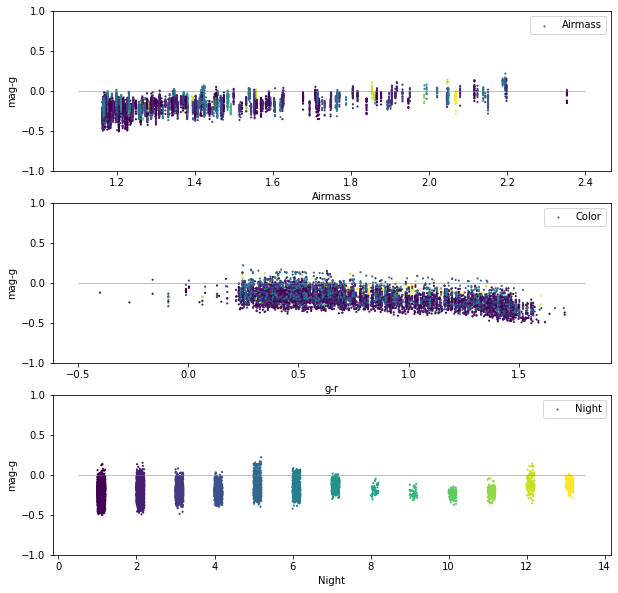

In [24]:
fig,axs = plt.subplots(3,1,figsize=(10,10))
axs[0].scatter(cat2['AIRMASS'],cat2['MAG']-cat2['G'],c=cat2['NIGHT'],marker='.',s=5,label='Airmass')
axs[0].plot([1.1,2.4],[0,0],c='gray',linewidth=1,alpha=0.5)
axs[0].set_xlabel('Airmass')
axs[0].set_ylabel('mag-g')
axs[0].set_ylim(-1,1)
axs[0].legend()
axs[1].scatter(cat2['G_R'],cat2['MAG']-cat2['G'],c=cat2['NIGHT'],marker='.',s=5,label='Color')
axs[1].plot([-0.5,1.8],[0,0],c='gray',linewidth=1,alpha=0.5)
axs[1].set_xlabel('g-r')
axs[1].set_ylabel('mag-g')
axs[1].set_ylim(-1,1)
axs[1].legend()
rnd = np.random.rand(len(cat2))*0.2
axs[2].scatter(cat2['NIGHT']+rnd,cat2['MAG']-cat2['G'],c=cat2['NIGHT'],marker='.',s=5,label='Night')
axs[2].plot([0.5,13.5],[0,0],c='gray',linewidth=1,alpha=0.5)
axs[2].set_xlabel('Night')
axs[2].set_ylabel('mag-g')
axs[2].set_ylim(-1,1)
axs[2].legend()

In [25]:
print('MADRMS = %9.4f' % madrms(cat2['MAG']-cat2['G']))

MADRMS =    0.2817


# Iterate

In [26]:
extcoef2 = np.polyfit(cat2['AIRMASS'],cat2['MAG']-cat2['G'],1)
extfn2 = np.poly1d(extcoef2)
xext2 = np.linspace(1,2.3,100)
extmodel2 = extfn2(xext2)
print(extfn2)
extresid2 = (cat2['MAG']-cat2['G']) - extfn2(cat2['AIRMASS'])

 
0.2194 x - 0.485


In [27]:
colcoef2 = np.polyfit(cat2['G_R'],extresid2,1)
colfn2 = np.poly1d(colcoef2)
xcol2 = np.linspace(0,2.0,100)
colmodel2 = colfn2(xcol2)
print(colfn2)
colextresid2 = extresid2 - colfn2(cat2['G_R'])

 
-0.1243 x + 0.09598


In [28]:
zpterm2 = np.zeros(13,float)
night = np.arange(13)+1
ntcolextresid2 = colextresid2.copy()
for i in range(13):
    g, = np.where(cat2['NIGHT']==night[i])
    med = np.median(colextresid2[g])
    zpterm2[i] = med
    ntcolextresid2[g] -= med
    print('%2d %5d %6.3f' % (night[i],len(g),med))

 1  2607 -0.021
 2  1613  0.014
 3  1128 -0.015
 4  1112 -0.023
 5   775  0.043
 6   665 -0.009
 7   401  0.068
 8    45 -0.007
 9    48 -0.059
10   103 -0.023
11   199 -0.007
12   205  0.049
13   198 -0.015


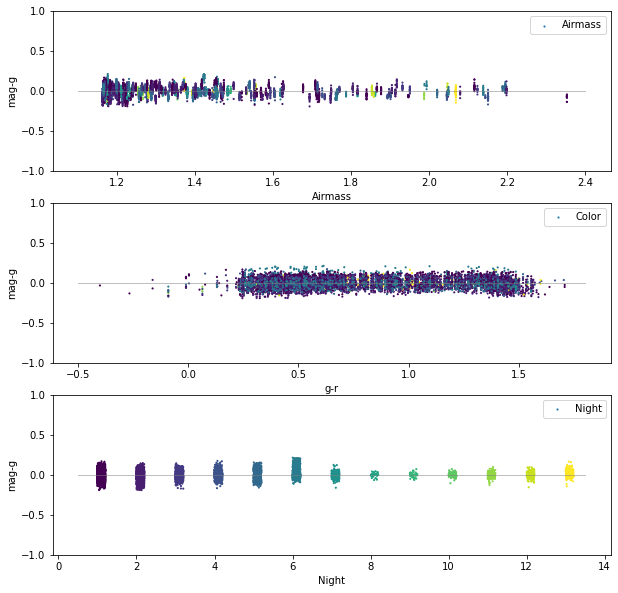

In [29]:
fig,axs = plt.subplots(3,1,figsize=(10,10))
axs[0].scatter(cat2['AIRMASS'],ntcolextresid2,c=cat2['NIGHT'],marker='.',s=5,label='Airmass')
axs[0].plot([1.1,2.4],[0,0],c='gray',linewidth=1,alpha=0.5)
axs[0].set_xlabel('Airmass')
axs[0].set_ylabel('mag-g')
axs[0].set_ylim(-1,1)
axs[0].legend()
axs[1].scatter(cat2['G_R'],ntcolextresid2,c=cat2['NIGHT'],marker='.',s=5,label='Color')
axs[1].plot([-0.5,1.8],[0,0],c='gray',linewidth=1,alpha=0.5)
axs[1].set_xlabel('g-r')
axs[1].set_ylabel('mag-g')
axs[1].set_ylim(-1,1)
axs[1].legend()
rnd = np.random.rand(len(cat2))*0.2
axs[2].scatter(cat2['NIGHT']+rnd,ntcolextresid2,c=cat2['NIGHT'],marker='.',s=5,label='Night')
axs[2].plot([0.5,13.5],[0,0],c='gray',linewidth=1,alpha=0.5)
axs[2].set_xlabel('Night')
axs[2].set_ylabel('mag-g')
axs[2].set_ylim(-1,1)
axs[2].legend()

In [30]:
print('MADRMS = %9.4f' % madrms(ntcolextresid2))

MADRMS =    0.0589
